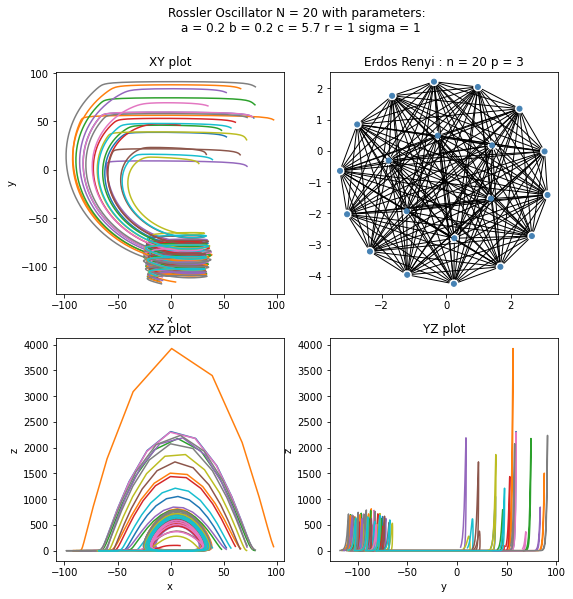

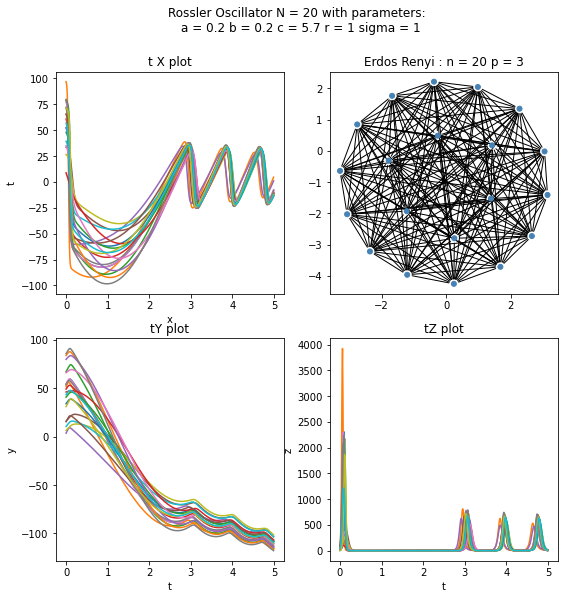

In [134]:
#!/usr/bin/env python
# coding: utf-8

import matplotlib.pyplot as plt
import random
import numpy as np
import copy
import scipy
from scipy.integrate import odeint
import seaborn as sns
import igraph as ig
from matplotlib import animation

def motion(q_0, t_span, omegas, K, N, adj):
    s1 = odeint(func= kuramoto_1, y0 = q_0, t=t_span, args=(omegas, K, N, adj) )
    q = s1[:,::]
    dq = np.zeros(np.shape(q))
    for i in range(len(t_span)):
        dq[i] = kuramoto_1(q[i], t_span[i], omegas, K, N, adj)
    return q, dq


def rossler(_q, _t, _a, _b, _c, _r, _sigma, _N, _adj):
    _dq = np.zeros(np.shape(_q))
    x, y, z = _q[0::3], _q[1::3], _q[2::3]
    dx, dy, dz = _dq[0::3], _dq[1::3], _dq[2::3]
    
    # N nodi della rete
    for i in range(_N):
        dx[i] =  -y[i] - z[i] + _sigma/(2*_r*_N) * np.sum( _adj[i] * (x - x[i]) )
        dy[i] =  x[i] + _a*y[i] + _sigma/(2*_r*_N) * np.sum( _adj[i] * (y - y[i]) )
        dz[i] =  _b + z[i]*(x[i] - _c) + _sigma/(2*_r*_N) * np.sum( _adj[i] * (z - z[i]) )
            
    return _dq
    

def r_parameter(_q, _N):
    _r = np.abs( np.sum( np.exp(np.cdouble(_q)*1j) / _N ))
    return _r

def r_mean_parameter(_q_0, _t_span, _omegas, _K , _N, _adj):
    _r_mean = 0
    _q, _dq = motion( _q_0, _t_span, _omegas, _K, _N, _adj)
    for t_count in range(len(_t_span)):
        _r_mean += r_parameter(_q[t_count,:], _N)
    #media
    _r_mean *= 1./len(t_span)
    return _r_mean

random.seed(0)

# parameters model 
N = 20

# initial conditions
q_0 = np.random.rand(3*N)*100

# simulation 
dt = 0.0001
t_max = 5 
t_span = np.arange(0, t_max, dt)

a = 0.2
b = 0.2
c = 5.7
r = 1
sigma = 1

# network parameters
p = 1 
k = 3


# In[49]:


# name_graph = "Watts Strogatz : n = {} k = {} p = {}".format(N, k, p)
name_graph = "Erdos Renyi : n = {} p = {}".format(N, k, p)
graph = ig.Graph.Erdos_Renyi(n=N, p=p, directed=False, loops=False)
# g_watts_strogatz = ig.Graph.Watts_Strogatz(dim = 1, size = 20, nei = 1, p = 0.2)
# g_barabasi_albert = ig.Graph.Barabasi(n = N, m = 2 )
ig.plot(graph, layout='grid')
adj = graph.get_adjacency()
plt.show()

# integrate dynamics 
sol = odeint(func= rossler, y0 = q_0, t=t_span, args=(a, b, c, r, sigma, N, adj) )

# plot coordinates
plt.close('all')
#new figure to plot network graphs
fig = plt.figure(figsize = (9, 9) )
fig.suptitle("Rossler Oscillator N = {5} with parameters: \n a = {0:.6g} b = {1:.6g} c = {2:.6g} r = {3:.6g} sigma = {4:.6g}".format(a, b, c, r, sigma, N))
axs_xy = fig.add_subplot(2,2,1)
axs_xy.set(xlabel="x", ylabel="y", title= "XY plot")
plt.plot(sol[:,0::3][::100], sol[:,1::3][::100])

axs_network = fig.add_subplot(2,2,2)
ig.plot(graph, target = axs_network)
#axs_network.set(title="Erdos-Renyi: p = {}, N = {}".format(p, N))
axs_network.set(title=name_graph)

axs_xz = fig.add_subplot(2, 2, 3)
plt.plot(sol[:,0::3][::100], sol[:,2::3][::100])
axs_xz.set(xlabel="x", ylabel="z", title= "XZ plot")

axs_yz = fig.add_subplot(2, 2, 4)
plt.plot(sol[:,1::3][::100], sol[:,2::3][::100])
axs_yz.set(xlabel="y", ylabel="z", title= "YZ plot")

plt.show()

# plot time vs axis
fig = plt.figure(figsize = (9, 9) )
fig.suptitle("Rossler Oscillator N = {5} with parameters: \n a = {0:.6g} b = {1:.6g} c = {2:.6g} r = {3:.6g} sigma = {4:.6g}".format(a, b, c, r, sigma, N))
axs_xt = fig.add_subplot(2,2,1)
axs_xt.set(xlabel="x", ylabel="t", title= "t X plot")
plt.plot(t_span[::100], sol[:,0::3][::100])

axs_network = fig.add_subplot(2,2,2)
ig.plot(graph, target = axs_network)
axs_network.set(title=name_graph)

axs_yt = fig.add_subplot(2, 2, 3)
plt.plot(t_span[::100], sol[:,1::3][::100])
axs_yt.set(xlabel="t", ylabel="y", title= "tY plot")

axs_zt = fig.add_subplot(2, 2, 4)
plt.plot(t_span[::100], sol[:,2::3][::100])
axs_zt.set(xlabel="t", ylabel="z", title= "tZ plot")

plt.show()



In [155]:
def plot_init():
    return

def replot(count, vt_size, t_span, network, ax):
    count = int(count)
    colors  = []
    for i in range(len(vt_size[count])):
        if vt_size[count, i] > 0:
            colors.append('red')
        elif vt_size[count, i] < 0:
            colors.append('blue')
    # take the size of the vertex from the x coordinate
    dots = ax.get_children()[0]
    dots.set_color(colors)
    dots.set_sizes(np.abs(vt_size[count]))
#    layout = "fruchterman_reingold"

def graph_plot(v_size, t_span, network, ax):
    layout = "grid"
    ig.plot(network, target = ax, margin = (200, 200, 200, 200),
#            layout=layout,        
            edge_width=1,
            edge_arrow_size = 1,
            vertex_size = 1 ,
            vertex_color=['red'], 
            vertex_frame_color='black',
            vertex_frame_width=1000,
            edge_color = 'black',
           # vertex_shape = 'triangle',
            keep_aspect_ratio=True
#            vertex_label=['first', 'second', 'third', 'fourth'],
#            edge_width=[1, 4],
#            edge_color=['black', 'grey'],
            )   
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

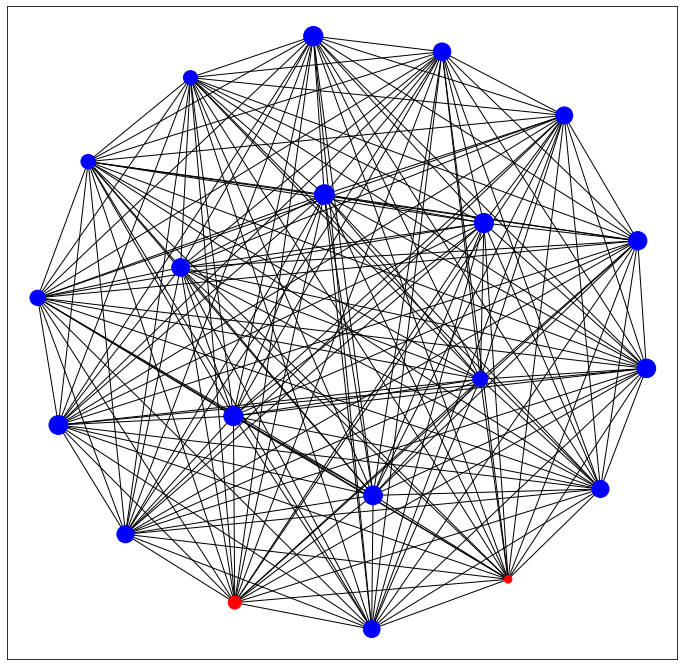

In [156]:
plt.close('all')
f = plt.figure(figsize = (12, 12))
a = f.add_subplot(1, 1, 1)
fps = 10
t_start = 0
q = np.linspace(0, len(t_span) - 1, t_max*fps)
size_t = sol[:, 0::3]*30

frames = np.linspace(0, len(t_span) - 1, t_max*fps)
graph_plot(size_t[0], t_span, graph, a)
anim = animation.FuncAnimation(f, func = replot, interval = 1000/fps , frames = frames  , fargs = (size_t, t_span, graph, a), init_func=plot_init)
ig.plot(graph, vertex_size= size_t[0])

anim.save("graph.mp4")